In [1]:
using ITensors
import TensorCrossInterpolation as TCI
using TCIITensorConversion
using QuanticsGrids
using Plots
using HDF5
include("../../src/functions.jl")

packages uploaded
------------------------------


functions uploaded
------------------------------


**Using the TCI to find the TN form**

THE SHIFTED FUNCTION 

In [116]:


Ln = 25 # for n
Lpx = 10 # for px
Lpy = 10 # for py
Lkx = 8 # for kx
Lky = 8 # for ky


###########################
#  kx  px  n   py  ky
#  O---O---O---O---O
#  |   |   |   |   |
###########################

L = Int(Ln + Lpx + Lpy + Lkx + Lky)

β = 100
p_max = 2π    
k_max = 2π
ω_max = 0
#kx = k_max * cos(π/3)
#ky = k_max * sin(π/3)
T = 1/β
m = 0 #The 

μ = 1
epsilon(kx:: Real, ky::Real) = sqrt(abs(3 + 2 * cos(sqrt(3) * ky) + 4 * cos(sqrt(3) / 2 * ky) * cos(3 / 2 * kx))) - μ #sqrt(px^2+ py^2) - μ

G(iω, kx,ky) = 1/(iω - epsilon(kx,ky))



function f(v)
    # Extract sections of the vector `v` in the order: kx, px, n, py, ky
    x3 = b2c(v[1:Lkx])  # kx is the first segment
    x1 = b2c(v[Lkx + 1:Lkx + Lpx])  # px follows kx
    x = b2c(v[Lkx + Lpx + 1:Lkx + Lpx + Ln])  # n follows px
    x2 = b2c(v[Lkx + Lpx + Ln + 1:Lkx + Lpx + Ln + Lpy])  # py follows n
    x4 = b2c(v[Lkx + Lpx + Ln + Lpy + 1:Lkx + Lpx + Ln + Lpy + Lky])  # ky follows py
    
    # Compute intermediate values
    n = 2^(Ln + 1) * (x - 1/2)
    iω = (2*n + 1) * π * T * im
    px = p_max * (x1 - 1/2)
    py = p_max * (x2 - 1/2)
    kx = k_max * (x3 - 1/2)
    ky = k_max * (x4 - 1/2)

    # Return the Green's function G
    return G(iω, kx + px, ky + py)
end

localdims = fill(2, L)  # Fill the tensor with dimensions of size 2

tolerance = 1e-11

tci, ranks, errors = TCI.crossinterpolate2(ComplexF64, f, localdims; tolerance=tolerance, maxbonddim = 1100)

mps_shifted = MPS(tci)

println("mps_shifted calculation is done")

h5open("mps_shifted_data_3_kx_px_n_py_ky.h5", "w") do file
    write(file, "MPS", mps_shifted)
end
println("file saved successfully")

mps_shifted calculation is done


file saved successfully


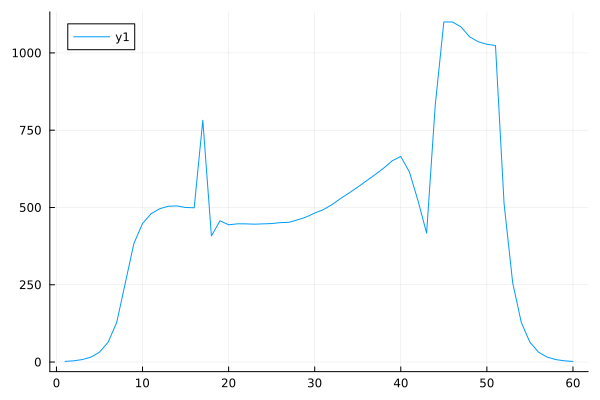

In [117]:

plot([i for i in linkdims(mps_shifted)])

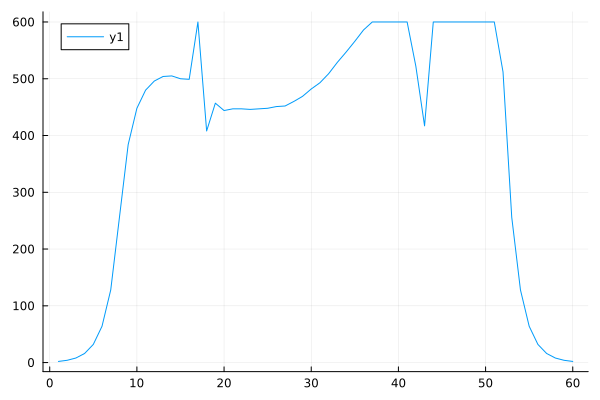

In [118]:
G_mps_shifted = copy(mps_shifted)
truncate!(G_mps_shifted, maxdim = 600)

plot([i for i in linkdims(G_mps_shifted)])

In [81]:

Ln = 25 # for n
Lpx = 10 # for px
Lpy = 10 # for py
Lkx = 8 # for kx
Lky = 8 # for ky

8

10


20


30


40


50


60


70


80


90


100


110


120


130


140


150


160


170


180


190


200


210


220


230


240


250


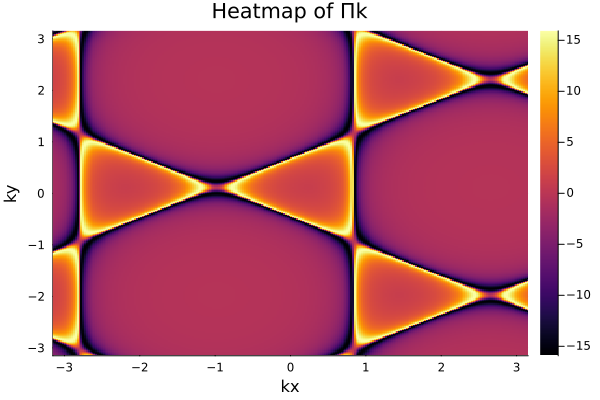

In [119]:
# Define k_max and the ranges for kx and ky
kx_range = LinRange(-k_max/2, k_max/2, 2^Lkx)
ky_range = LinRange(-k_max/2, k_max/2, 2^Lky)
n =  0
qx = 2
qy = 1
qx_b = c2b(qx/k_max + 1/2, Lkx)
qy_b = c2b(qy/k_max + 1/2, Lky)


# Initialize an empty matrix to store Πk values
Gk2_shift = zeros(ComplexF64, length(kx_range), length(ky_range))

# Loop over kx and ky to evaluate Πk
for i in 1:length(kx_range)
    for j in 1:length(ky_range)
        kx = kx_range[i]
        ky = ky_range[j]
        
        # Transformation functions
        x = c2b(1/2, Ln)
        x1 = c2b(kx/k_max + 1/2, Lpx)
        x2 = c2b(ky/k_max + 1/2, Lpy)
        s = [qx_b; x1; x ;x2; qy_b]        # Evaluate Πk for the current kx and ky
        Gk2_shift[i, j] = evaluate(G_mps_shifted, s)
    end
    
    # Print progress every 10 iterations
    if i % 10 == 0
        println(i)
    end
end

heatmap(
    kx_range, ky_range, real.(Gk2_shift),
    xlabel="kx", ylabel="ky",
    title="Heatmap of Πk")

In [97]:


Ln = 25 # for n
Lpx = 10 # for px
Lpy = 10 # for py
#Lkx = 8 # for kx
#Lky = 8 # for ky


###########################
#  kx  px  n   py  ky
#  O---O---O---O---O
#  |   |   |   |   |
###########################

L = Int(Ln + Lpx + Lpy)

β = 100
p_max = 2π    
k_max = 2π
ω_max = 0
#kx = k_max * cos(π/3)
#ky = k_max * sin(π/3)
T = 1/β
m = 0 #The 

μ = 1

epsilon(kx:: Real, ky::Real) = sqrt(abs(3 + 2 * cos(sqrt(3) * ky) + 4 * cos(sqrt(3) / 2 * ky) * cos(3 / 2 * kx))) - μ #sqrt(px^2+ py^2) - μ

G(iω, kx,ky) = 1/(iω - epsilon(kx,ky))



function f(v)
    # Extract sections of the vector `v` in the order: px, kx, n, ky, py
    x1 = b2c(v[1:Lpx])  # px is the first segment

    x = b2c(v[Lpx + 1:Lpx + Ln])  # n follows kx

    x2 = b2c(v[Lpx + Ln + 1: Lpx + Ln + Lpy])  # py follows ky
    
    # Compute intermediate values
    n = 2^(Ln + 1) * (x - 1/2)
    iω = (2*n + 1) * π * T * im
    px = p_max * (x1 - 1/2)
    py = p_max * (x2 - 1/2)
   

    # Return the Green's function G
    return G(iω, px, py)
end

localdims = fill(2, L)  # Fill the tensor with dimensions of size 2

tolerance = 1e-11

tci, ranks, errors = TCI.crossinterpolate2(ComplexF64, f, localdims; tolerance=tolerance, maxbonddim = 1100)

mps = MPS(tci)

println("mps calculation is done")

h5open("mps_data_2.h5", "w") do file
    write(file, "MPS", mps)
end
println("file saved successfully")

mps_shifted calculation is done


file saved successfully


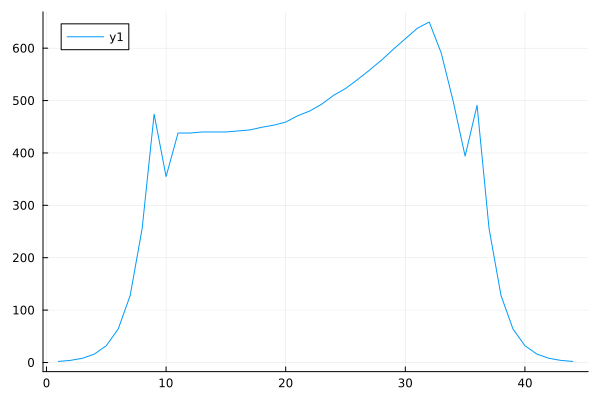

In [98]:
plot([i for i in linkdims(mps)])

In [99]:
# Define k_max and the ranges for kx and ky
kx_range = LinRange(-k_max/2, k_max/2, 250)
ky_range = LinRange(-k_max/2, k_max/2, 250)
n =  0
qx = cos(π/3)
qy = sin(π/3)
qx_b = c2b(qx/k_max + 1/2, Lpx)
qy_b = c2b(qy/k_max + 1/2, Lpy)


# Initialize an empty matrix to store Πk values
Gk = zeros(ComplexF64, length(kx_range), length(ky_range))

# Loop over kx and ky to evaluate Πk
for i in 1:length(kx_range)
    for j in 1:length(ky_range)
        kx = kx_range[i]
        ky = ky_range[j]
        
        # Transformation functions
        x = c2b(1/2, Ln)
        x1 = c2b(kx/k_max + 1/2, Lpx)
        x2 = c2b(ky/k_max + 1/2, Lpy)
        s = [ x1; x ; x2 ]        # Evaluate Πk for the current kx and ky
        Gk[i, j] = evaluate(mps, s)
    end
    
    # Print progress every 10 iterations
    if i % 10 == 0
        println(i)
    end
end

10


20


30


40


50


60


70


80


90


100


110


120


130


140


150


160


170


180


190


200


210


220


230


240


250


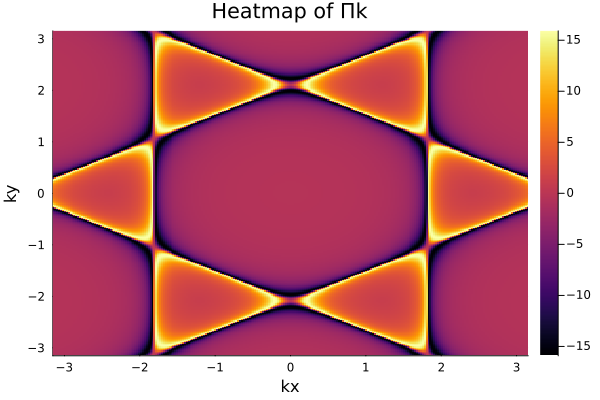

In [100]:
heatmap(
    kx_range, ky_range, real.(Gk),
    xlabel="kx", ylabel="ky",
    title="Heatmap of Πk")

**MAKE THE NETWORK WITH CONTRACTION**

We save the   "mps" and "mps_shifted" in the following files respectivly:

mps : "mps_data_2.h5"

mps_shifted : "mps_shifted_data_3_kx_px_n_py_ky.h5"

We define the contraction indese to define the network

In [102]:
contract_sites = [siteinds(mps_shifted)[1:Lpx]; siteinds(mps_shifted)[Lpx+Lkx+1:Lpx+Lkx+Ln]; siteinds(mps_shifted)[Lpx+Lkx+Ln+Lky+1:Lpx+Lkx+Ln+Lky+Lpy]] 

45-element Vector{Index{Int64}}:
 (dim=2|id=365|"n=1")
 (dim=2|id=972|"n=2")
 (dim=2|id=523|"n=3")
 (dim=2|id=152|"n=4")
 (dim=2|id=448|"n=5")
 (dim=2|id=20|"n=6")
 (dim=2|id=393|"n=7")
 (dim=2|id=721|"n=8")
 (dim=2|id=254|"n=9")
 (dim=2|id=337|"n=10")
 ⋮
 (dim=2|id=644|"n=53")
 (dim=2|id=891|"n=54")
 (dim=2|id=7|"n=55")
 (dim=2|id=981|"n=56")
 (dim=2|id=882|"n=57")
 (dim=2|id=842|"n=58")
 (dim=2|id=342|"n=59")
 (dim=2|id=568|"n=60")
 (dim=2|id=973|"n=61")

In [6]:
using ITensors
import TensorCrossInterpolation as TCI
using TCIITensorConversion
using QuanticsGrids
using Plots
using HDF5
include("../../src/functions.jl")


Ln = 25
Lpx = 10
Lpy = 10
Lkx = 8
Lky = 8


β = 100
p_max = 2π    
k_max = 2π
ω_max = 0

# Load the MPS from the HDF5 file
mps2 = h5open("mps_data_2.h5", "r") do file
    read(file, "MPS", MPS)
end

# Load the MPS from the HDF5 file
mps_shifted = h5open("mps_shifted_data_3_kx_px_n_py_ky.h5", "r") do file
    read(file, "MPS", MPS)
end




contract_sites = siteinds(mps_shifted)[Lkx+1:Lkx+Lpx+Ln+Lpy]
i = 1
for m in mps2
    mps2[i] = m * delta(siteinds(mps2)[i], contract_sites[i])
    i+=1
end
println()

packages uploaded
------------------------------


functions uploaded
------------------------------


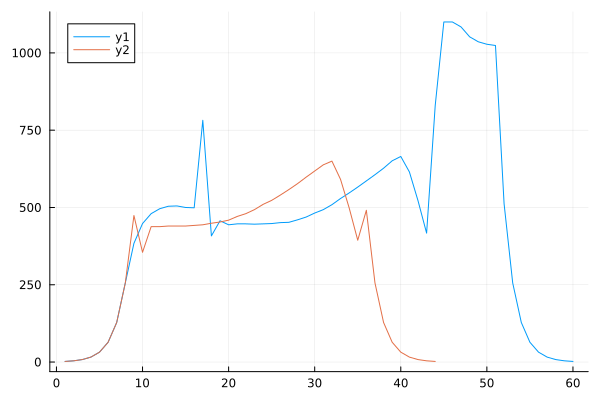

In [7]:
plot([χ for χ in linkdims(mps_shifted)])
plot!([χ for χ in linkdims(mps2)])

In [2]:
truncate!(mps2, maxdim = 650)
truncate!(mps_shifted, maxdim = 650)
println()

In [2]:
I = MPS(Lkx+Lky)
println()

In [3]:
Clinked = mps_shifted[Lkx+1] * mps2[1]
Clinked *= mps2[2]
Clinked *= mps_shifted[Lkx+2]

ITensor ord=3 (dim=256|id=50|"l=8,link") (dim=4|id=491|"l=2,link") (dim=448|id=479|"l=10,link")
NDTensors.Dense{ComplexF64, Vector{ComplexF64}}

In [4]:
Clinked = mps_shifted[Lkx+1] * mps2[1]
for i in range(2,length(mps2))
    Clinked *= mps2[i]
    Clinked *= mps_shifted[Lkx+i]
    println(i)
end



2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


45


In [5]:
for i in range(1,Lkx)
    I[i] = mps_shifted[i]
end
I[Lkx] *= Clinked
for i in range(Lkx+1,Lkx+Lky)
    I[i] = mps_shifted[Lpx+Ln+Lpy+i]
end

In [6]:
I

MPS
[1] ((dim=2|id=760|"n=1"), (dim=2|id=362|"l=1,link"))
[2] ((dim=2|id=362|"l=1,link"), (dim=2|id=905|"n=2"), (dim=4|id=269|"l=2,link"))
[3] ((dim=4|id=269|"l=2,link"), (dim=2|id=53|"n=3"), (dim=8|id=925|"l=3,link"))
[4] ((dim=8|id=925|"l=3,link"), (dim=2|id=314|"n=4"), (dim=16|id=104|"l=4,link"))
[5] ((dim=16|id=104|"l=4,link"), (dim=2|id=993|"n=5"), (dim=32|id=47|"l=5,link"))
[6] ((dim=32|id=47|"l=5,link"), (dim=2|id=212|"n=6"), (dim=64|id=523|"l=6,link"))
[7] ((dim=64|id=523|"l=6,link"), (dim=2|id=276|"n=7"), (dim=128|id=128|"l=7,link"))
[8] ((dim=128|id=128|"l=7,link"), (dim=2|id=942|"n=8"), (dim=256|id=472|"l=53,link"))
[9] ((dim=256|id=472|"l=53,link"), (dim=2|id=798|"n=54"), (dim=128|id=225|"l=54,link"))
[10] ((dim=128|id=225|"l=54,link"), (dim=2|id=731|"n=55"), (dim=64|id=990|"l=55,link"))
[11] ((dim=64|id=990|"l=55,link"), (dim=2|id=173|"n=56"), (dim=32|id=754|"l=56,link"))
[12] ((dim=32|id=754|"l=56,link"), (dim=2|id=18|"n=57"), (dim=16|id=674|"l=57,link"))
[13] ((dim=16|id

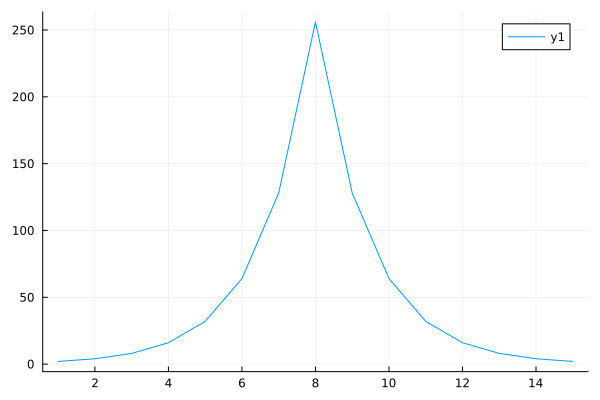

In [7]:
plot([χ for χ in linkdims(I)])

In [8]:
β = 100
p_max = 2π    
k_max = 2π
ω_max = 0

# Define k_max and the ranges for kx and ky
kx_range = LinRange(-k_max/2, k_max/2, 250)
ky_range = LinRange(-k_max/2, k_max/2, 250)






# Initialize an empty matrix to store Πk values
Πk = zeros(ComplexF64, length(kx_range), length(ky_range))

# Loop over kx and ky to evaluate Πk
for i in 1:length(kx_range)
    for j in 1:length(ky_range)
        kx = kx_range[i]
        ky = ky_range[j]
        
        # Transformation functions
        x1 = c2b(kx/k_max + 1/2, Lkx)
        x2 = c2b(ky/k_max + 1/2, Lky)
        s = [ x1; x2 ]        # Evaluate Πk for the current kx and ky
        Πk[i, j] = (1/2^(Lpx+Lpy))*evaluate(I, s)/β 
    end
    
    # Print progress every 10 iterations
    if i % 10 == 0
        println(i)
    end
end

10


20


30


40


50


60


70


80


90


100


110


120


130


140


150


160


170


180


190


200


210


220


230


240


250


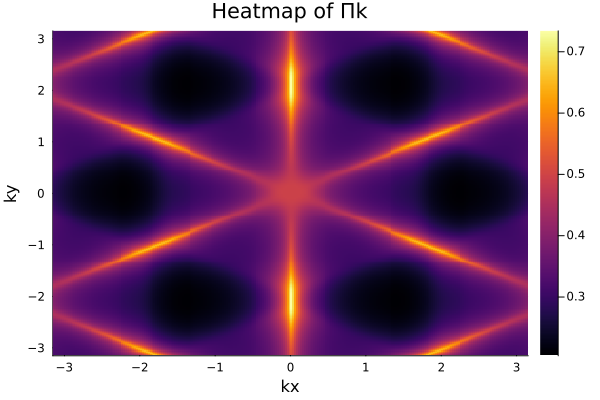

In [25]:
heatmap(
    kx_range, ky_range, -(1/2^(Lpx+Lpy))*real.(Πk) ,
    xlabel="kx", ylabel="ky",
    title="Heatmap of Πk")

**Saving the I tensor and the Polarization for visualization**

In [11]:
# Saving I as MPS

println("mps_shifted calculation is done")

h5open("mps_polarization_8kx_8ky.h5", "w") do file
    write(file, "MPS", I)
end
println("file saved successfully")

mps_shifted calculation is done


file saved successfully


In [14]:
using HDF5



# Define the filename
filename = "Πk_values.h5"

# Open the HDF5 file and write the matrix
h5write(filename, "Πk", Πk)
kx_range_vec = collect(kx_range)
ky_range_vec = collect(ky_range)
# Optionally, you can also save kx_range and ky_range for reference
h5write(filename, "kx_range", kx_range_vec)
h5write(filename, "ky_range", ky_range_vec)

println("Data saved to $filename")

Data saved to Πk_values.h5


**Reload the Data and Plot**

In [15]:
using HDF5

# Define the filename
filename = "Πk_values.h5"

# Open the HDF5 file and read the data
Πk = h5read(filename, "Πk")
kx_range = h5read(filename, "kx_range")
ky_range = h5read(filename, "ky_range")

println("Data successfully loaded from $filename")

Data successfully loaded from Πk_values.h5


In [23]:
maximum(real(Πk))

-214101.24850140675

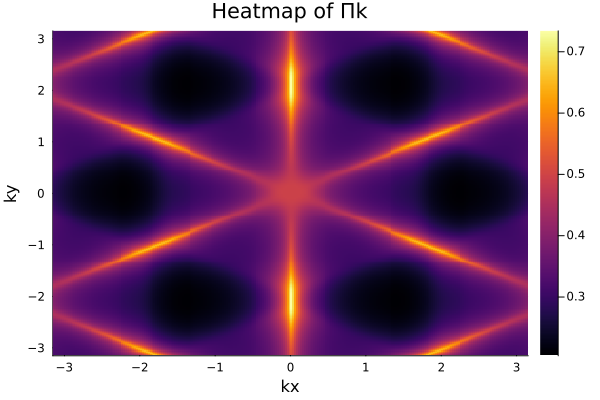

In [27]:
heatmap(
    kx_range, ky_range, -(1/2^(Lpx+Lpy))*real.(Πk) ,
    xlabel="kx", ylabel="ky",
    title="Heatmap of Πk")

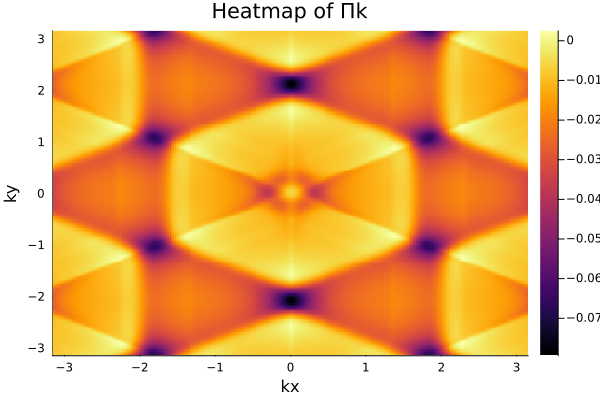

In [26]:
heatmap(
    kx_range, ky_range, -(1/2^(Lpx+Lpy))*imag.(Πk) ,
    xlabel="kx", ylabel="ky",
    title="Heatmap of Πk")